In [1]:
import numpy as np
import katpoint
import matplotlib
import pylab as pl
from datetime import timedelta
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This notebook calculates the UV coverage for a given source and
observation duration on the MeerKAT telescope.

If the target source is not up the notebook will produce a
NeverUpError with infomation about the 'Simulated_Target' transiting
below the horizon.

There are 3 varibles that can be changed in the cell below.
1. Target_RA,Target_Dec
2. Observation_Duration
3. Horizon

In [2]:
# The target coordinates
Target_RA,Target_Dec = "11:50:17.7", "-30:10:56.9"

# The observation duration in decimal hours.
# Setting it to None simulates the uv track of the source from horizon to horizon. (24 hours for circumpolar coordinates.)
# e.g. Observation_Duration = None
Observation_Duration = 10.0

# The horizon limit can be in units of degrees or radians if specifed
# as an int or float respectivey. Observing below 20 degrees is
# discouraged with MeerKAT.
Horizon = "20"

In [3]:
ant1 = katpoint.Antenna('ant1, -30:42:39.8, 21:26:38.0, 1086.6')
ant1.ref_observer.horizon = str(Horizon)
target = katpoint.Target('Simulated_Target, radec target, %s, %s'%(Target_RA, Target_Dec))

In [4]:
# How long is the source above the Horizon?
start_timestamp = katpoint.Timestamp()
start_ed = start_timestamp.to_ephem_date()
target.body.compute(ant1.ref_observer)

mid = ant1.ref_observer.next_transit(target.body, start=start_ed).datetime()

if target.body.circumpolar :
    if Observation_Duration is None :
        Observation_Duration = 24.
    print ("The source is circumpolar")
    time1 = mid - timedelta(hours= Observation_Duration/2)
    time2 = mid + timedelta(hours= Observation_Duration/2)
else :
    time1_tmp = ant1.ref_observer.next_rising(target.body, start=start_ed).datetime() # Rising
    time2_tmp = ant1.ref_observer.next_setting(target.body, start=time1_tmp).datetime() # Setting after next Rise
    delta = time2_tmp-time1_tmp

    if Observation_Duration is not None and delta.total_seconds()/3600. < Observation_Duration :
        print("Target source not above horizon for Observation_Duration = %.2f Hours"%Observation_Duration)
        print("Target is above horizon for %.2f hours"%(delta.total_seconds()/3600.))
        print("Using Observation_Duration = %.2f hours instead.\n"%(delta.total_seconds()/3600.))
        Observation_Duration = None # Go from horizon to Horizon

    if Observation_Duration is None :
        time1 = time1_tmp
        time2 = time2_tmp
    else :
        time1 = mid - timedelta(hours=Observation_Duration/2)
        time2 = mid + timedelta(hours=Observation_Duration/2)

delta=time2-time1
upt2=delta.total_seconds()/3600

print("Simulation start: %s " %(time1.strftime("%d/%m/%Y, %H:%M:%S")))
print(" Simulation stop: %s " %(time2.strftime("%d/%m/%Y, %H:%M:%S")))
print("          Uptime: %.2f hours"% (upt2))

Simulation start: 25/06/2020, 11:08:31 
 Simulation stop: 25/06/2020, 21:08:31 
          Uptime: 10.00 hours


/home/passmoor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: the ephem.Body attributes 'rise_time', 'rise_az', 'transit_time', 'transit_alt', 'set_time', 'set_az', 'circumpolar', and 'never_up' are deprecated; please convert your program to use the ephem.Observer functions next_rising(), previous_rising(), next_transit(), and so forth

  


In [5]:
ants=['' for x in range(64)] # setup
ants[0]=katpoint.Antenna('m000, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -8.264   -207.290 8.597')
ants[1]=katpoint.Antenna('m001, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 1.121 -171.762  8.471')
ants[2]=katpoint.Antenna('m002, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -32.113  -224.236  8.645')
ants[3]=katpoint.Antenna('m003, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -66.518  -202.276  8.285')
ants[4]=katpoint.Antenna('m004, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -123.624  -252.946  8.513')
ants[5]=katpoint.Antenna('m005, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -102.088  -283.120  8.875')
ants[6]=katpoint.Antenna('m006, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -18.232  -295.428  9.188')
ants[7]=katpoint.Antenna('m007, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -89.592  -402.732  9.769')
ants[8]=katpoint.Antenna('m008, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -93.527  -535.026  10.445')
ants[9]=katpoint.Antenna('m009, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 32.357   -371.056  10.140')
#
ants[10]=katpoint.Antenna('m010, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 88.095    -511.872  11.186')
ants[11]=katpoint.Antenna('m011, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 84.012 -352.078 10.151')
ants[12]=katpoint.Antenna('m012, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 140.019  -368.267  10.449')
ants[13]=katpoint.Antenna('m013, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 236.792  -393.460  11.124')
ants[14]=katpoint.Antenna('m014, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 280.669  -285.792  10.547')
ants[15]=katpoint.Antenna('m015, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 210.644 -219.142  9.738')
ants[16]=katpoint.Antenna('m016, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 288.159  -185.873  9.795')
ants[17]=katpoint.Antenna('m017, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 199.624  -112.263  8.955')
ants[18]=katpoint.Antenna('m018, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 105.727  -245.870  9.529')
ants[19]=katpoint.Antenna('m019, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 170.787  -285.223  10.071')
#
ants[20]=katpoint.Antenna('m020, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 97.016  -299.638  9.877')
ants[21]=katpoint.Antenna('m021, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -295.966  -327.241  8.117')
ants[22]=katpoint.Antenna('m022, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -373.002  0.544 5.649')
ants[23]=katpoint.Antenna('m023, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -322.306  -142.185  6.825')
ants[24]=katpoint.Antenna('m024, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -351.046  150.088 4.845')
ants[25]=katpoint.Antenna('m025, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -181.978 225.617 5.068')
ants[26]=katpoint.Antenna('m026, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -99.004  17.045  6.811')
ants[27]=katpoint.Antenna('m027, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  40.475   -23.112 7.694')
ants[28]=katpoint.Antenna('m028, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -51.179  -87.170 7.636')
ants[29]=katpoint.Antenna('m029, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -88.762  -124.111  7.700')
#
ants[30]=katpoint.Antenna('m030, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 171.281  113.949 7.278')
ants[31]=katpoint.Antenna('m031, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 246.567  93.756  7.469')
ants[32]=katpoint.Antenna('m032, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 461.275 175.505 7.367')
ants[33]=katpoint.Antenna('m033, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 580.678  863.959 3.600')
ants[34]=katpoint.Antenna('m034, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  357.811  -28.308 8.972')
ants[35]=katpoint.Antenna('m035, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  386.152  -180.894  10.290')
ants[36]=katpoint.Antenna('m036, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,   388.257  -290.759  10.812')
ants[37]=katpoint.Antenna('m037, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,   380.286  -459.309  12.172')
ants[38]=katpoint.Antenna('m038, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  213.308  -569.080  11.946')
ants[39]=katpoint.Antenna('m039, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  253.748  -592.147  12.441')
#
ants[40]=katpoint.Antenna('m040, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -26.858  -712.219  11.833')
ants[41]=katpoint.Antenna('m041, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -287.545  -661.678  9.949')
ants[42]=katpoint.Antenna('m042, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -361.714  -460.318  8.497')
ants[43]=katpoint.Antenna('m043, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -629.853  -128.326  5.264')
ants[44]=katpoint.Antenna('m044, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -896.164  600.497 -0.640')
ants[45]=katpoint.Antenna('m045, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -1832.860  266.750 0.108')
ants[46]=katpoint.Antenna('m046, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -1467.341  1751.923  -7.078')
ants[47]=katpoint.Antenna('m047, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -578.296  -517.297  7.615')
ants[48]=katpoint.Antenna('m048, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -2805.653  2686.863  -9.755')
ants[49]=katpoint.Antenna('m049, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -3605.957  436.462 2.696')
#
ants[50]=katpoint.Antenna('m050, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -2052.336  -843.715  5.338')
ants[51]=katpoint.Antenna('m051, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -850.255  -769.359  7.614')
ants[52]=katpoint.Antenna('m052, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -593.192  -1148.652 10.550')
ants[53]=katpoint.Antenna('m053, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  9.365  -1304.462 15.032')
ants[54]=katpoint.Antenna('m054, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  871.980  -499.812  13.364')
ants[55]=katpoint.Antenna('m055, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  1201.780 96.492  10.023')
ants[56]=katpoint.Antenna('m056, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  1598.403  466.668 6.990')
ants[57]=katpoint.Antenna('m057, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  294.645  3259.915  -10.637')
ants[58]=katpoint.Antenna('m058, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  2805.764  2686.873  -3.660')
ants[59]=katpoint.Antenna('m059, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  3686.427  758.895 11.822')
#
ants[60]=katpoint.Antenna('m060, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  3419.683 -1840.478 23.697')
ants[61]=katpoint.Antenna('m061, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -16.409 -2323.779 21.304')
ants[62]=katpoint.Antenna('m062, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -1440.632 -2503.773  21.683')
ants[63]=katpoint.Antenna('m063, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -3419.585 -1840.480 16.383')

In [6]:
def get_uvw(target,ants,timevalues):
    #setup empty uvw
    #Then loop through the half the antennas (n,m)
    #and calculate u,v,w for the target and antennas n and m
    u,v,w=[],[],[]
    for n in range(np.shape(ants)[0]-1):
        for m in range(n+1,np.shape(ants)[0]):
            u_new,v_new,w_new=target.uvw(ants[n], timevalues ,ants[m])
            u.extend(u_new)
            v.extend(v_new)
            w.extend(w_new)
    return np.array(u),np.array(v),np.array(w)

In [7]:
# Define a time range "t" we want to step through
t = start_timestamp.secs + np.linspace(0, upt2 * 60. * 60., 360.) # 360 is once every 6 min
start_timestamp = katpoint.Timestamp(str(time1)) # use a specific time as the start time (in UTC ... )
print ("Simulation start time %s"%(start_timestamp))
u,v,w = get_uvw(target, ants, t)

Simulation start time 2020-06-25 11:08:31.282


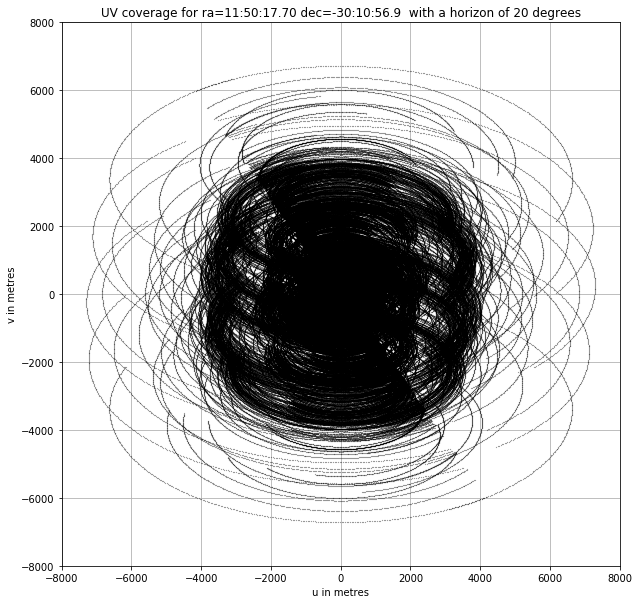

In [8]:
pl.figure(figsize=(10,10))
pl.plot(u,v,'ko',markersize=0.15)
pl.plot(-u,-v,'ko',markersize=0.15) # mirrored half
pl.title('UV coverage for ra=%s dec=%s  with a horizon of %s degrees'%(target.radec()[0], target.radec()[1], Horizon))
pl.xlim(-8000,8000)
pl.ylim(-8000,8000)
#pl.axes().set_aspect('equal')
pl.xlabel('u in metres')
pl.ylabel('v in metres')
pl.grid()
#pl.savefig('uvcoverage-30.png',dpi=600,quality=95,optimize=True)